Model Comparison:
Decision Tree: RMSE = 95.0289429595005
Random Forest: RMSE = 88.77193003368104
Linear Regression: RMSE = 75.77724959090519


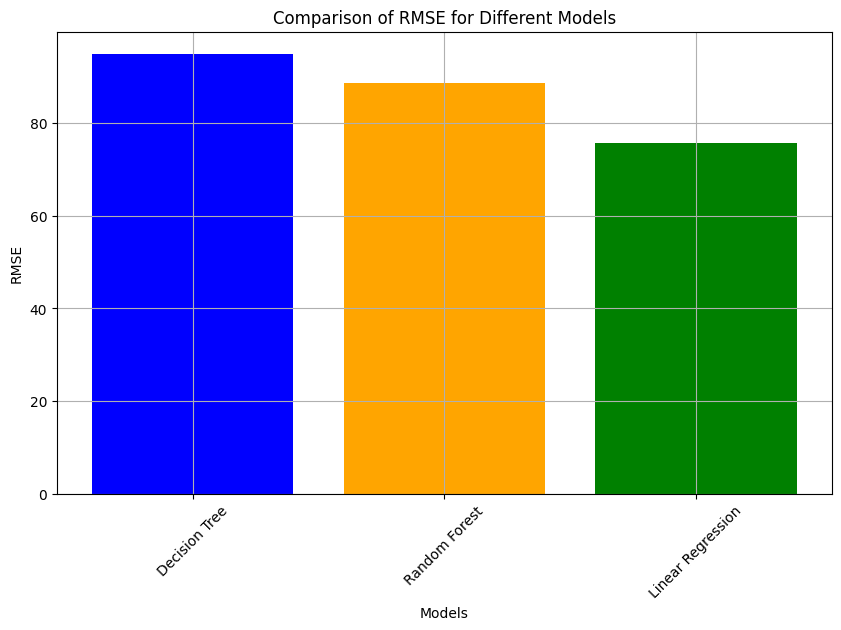

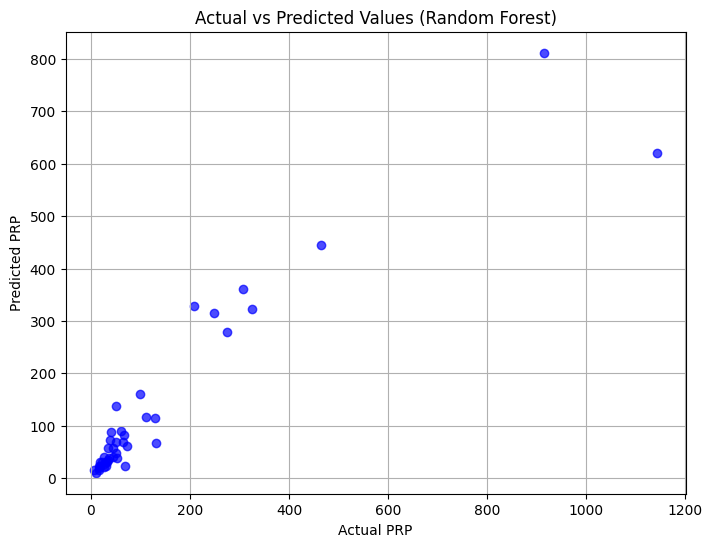

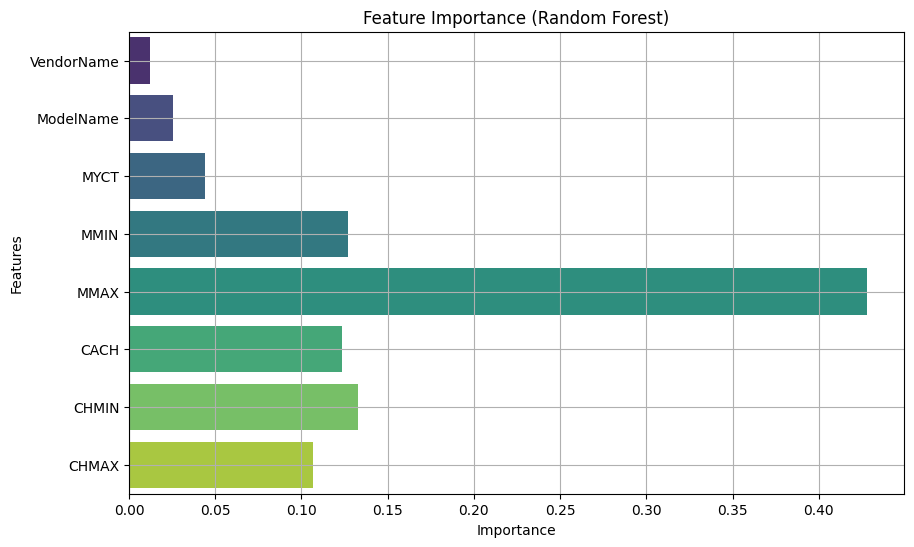

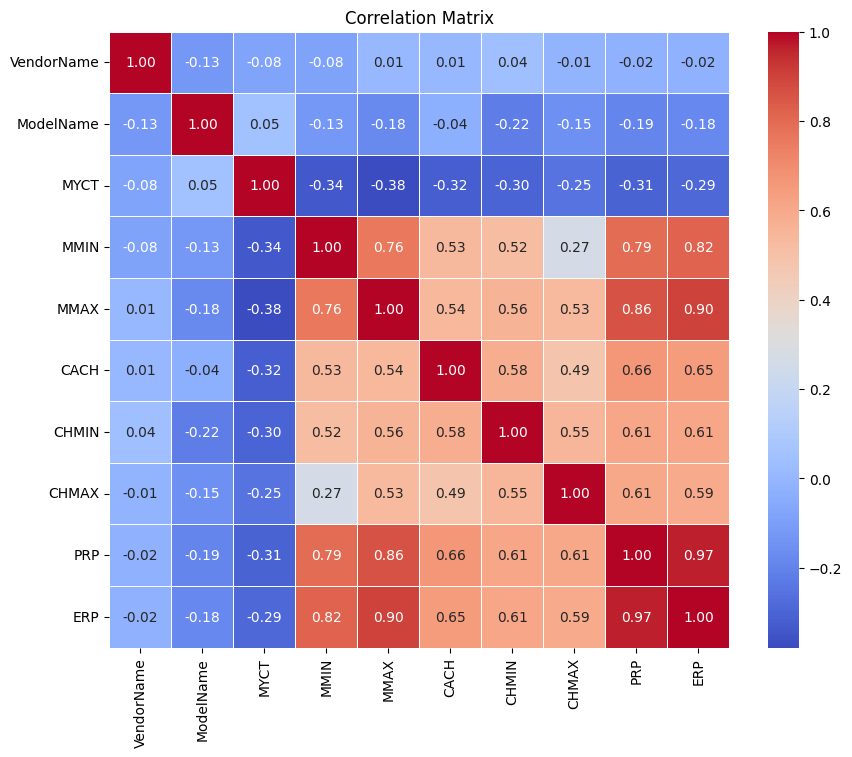

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Read Dataset
dataset_path = "/content/machine.csv"
column_names = ["VendorName", "ModelName", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
df = pd.read_csv(dataset_path, names=column_names)

# Task 2: Data Preprocessing
# Encode categorical variables
le_vendor = LabelEncoder()
df['VendorName'] = le_vendor.fit_transform(df['VendorName'])

le_model = LabelEncoder()
df['ModelName'] = le_model.fit_transform(df['ModelName'])

# Split data into features and target variable
X = df.drop(columns=['PRP', 'ERP'])
y = df['PRP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Task 3: Apply minimum 3 regression models
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Task 4: Compare the results
# Evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Linear Regression": lr_model
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test_scaled, y_test)

# Print results
print("Model Comparison:")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse}")

# Visualization
# Bar Chart for comparing RMSE of different models
plt.figure(figsize=(10, 6))
plt.bar(list(results.keys()), list(results.values()), color=['blue', 'orange', 'green'])
plt.title('Comparison of RMSE for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot for actual vs predicted values for Random Forest model
rf_predictions = rf_model.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.7)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.grid(True)
plt.show()

# Bar Chart for feature importance in Random Forest model
feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, hue=feature_names, palette="viridis", legend=False)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# with input


In [ ]:
# Creating a sample input data for prediction
sample_data = {
    'VendorName': ['ibm'],
    'ModelName': ['dn320'],
    'MYCT': [125],
    'MMIN': [256],
    'MMAX': [2048],
    'CACH': [512],
    'CHMIN': [4],
    'CHMAX': [16]
}

# Encode categorical variables in the sample data
sample_data['VendorName'] = le_vendor.transform(sample_data['VendorName'])
sample_data['ModelName'] = le_model.transform(sample_data['ModelName'])

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Print the sample data
print("Sample Input Data:")
print(sample_df)

# Predict using the best models
dt_prediction = dt_model.predict(sample_df)
rf_prediction = rf_model.predict(sample_df)
lr_prediction = lr_model.predict(sample_df)

# Print predictions
print("\nPredictions:")
print("With Decision Tree:", dt_prediction[0])
print("With Random Forest:", rf_prediction[0])
print("With Linear Regression:", lr_prediction[0])


Sample Input Data:
   VendorName  ModelName  MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX
0          17        148   125   256  2048   512      4     16

Predictions:
With Decision Tree: 1150.0
With Random Forest: 820.75
With Linear Regression: 155583.69255040368
